In [1]:
import numpy as np
import matplotlib.pyplot as plt
from process_images import *
from numpy_to_pandas import numpy_to_pandas_dataset
from utils import *

In [6]:
%load_ext autoreload
%autoreload 2

In [2]:
data = np.load("processed_dataset.npz")
df = numpy_to_pandas_dataset("processed_dataset.npz")
df.columns

Index(['pixel_00000', 'pixel_00001', 'pixel_00002', 'pixel_00003',
       'pixel_00004', 'pixel_00005', 'pixel_00006', 'pixel_00007',
       'pixel_00008', 'pixel_00009',
       ...
       'pixel_16375', 'pixel_16376', 'pixel_16377', 'pixel_16378',
       'pixel_16379', 'pixel_16380', 'pixel_16381', 'pixel_16382',
       'pixel_16383', 'label'],
      dtype='object', length=16385)

Ahora tenemos en df un DataFrame con las siguientes columnas:
- pixel_00000 - pixel_16383: 16384 (128x128) columnas, una para cada pixel, con un valor 0-255 de la escala de grises
- label: 0 si es Healthy, 1 si es Parkinson

In [3]:
# Dividimos el dataset en datos de entrenamiento y datos de test (80/20) - SIN SKLEARN

# Separar features (píxeles) y target (label)
X = df.drop('label', axis=1).values  # Convertir a numpy array
y = df['label'].values               # Convertir a numpy array

# Configuración del split
test_size = 0.2
random_state = 42
np.random.seed(random_state)  # Para reproducibilidad

# Obtener índices aleatorios
n_samples = len(X)
n_test = int(n_samples * test_size)
indices = np.random.permutation(n_samples)

# Dividir índices
test_indices = indices[:n_test]
train_indices = indices[n_test:]

# Crear splits
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

print(f"Dataset completo: {len(X)} muestras")
print(f"Train set: {len(X_train)} muestras ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} muestras ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nDistribución de clases en train:")
print(f"  - Healthy (0): {np.sum(y_train == 0)}")
print(f"  - Parkinson (1): {np.sum(y_train == 1)}")
print(f"\nDistribución de clases en test:")
print(f"  - Healthy (0): {np.sum(y_test == 0)}")
print(f"  - Parkinson (1): {np.sum(y_test == 1)}")

Dataset completo: 1632 muestras
Train set: 1306 muestras (80.0%)
Test set: 326 muestras (20.0%)

Distribución de clases en train:
  - Healthy (0): 637
  - Parkinson (1): 669

Distribución de clases en test:
  - Healthy (0): 179
  - Parkinson (1): 147


Epoch 0: Loss = 359.3409
Epoch 100: Loss = 330.9348
Epoch 200: Loss = 330.8605
Epoch 300: Loss = 330.7864
Epoch 400: Loss = 330.7124
Epoch 500: Loss = 330.6385
Epoch 600: Loss = 330.5647
Epoch 700: Loss = 330.4911
Epoch 800: Loss = 330.4175
Epoch 900: Loss = 330.3442


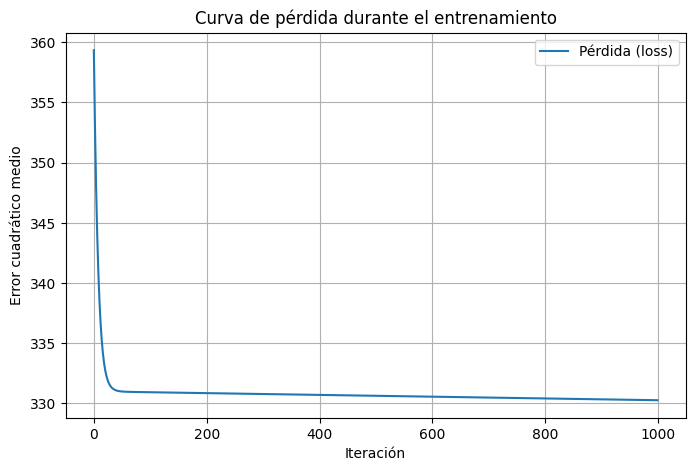

In [17]:
w_final, b_final, loss_history = gradient_descent(X_train, y_train, alpha=0.0000001, num_epochs=1000)
plot_loss_curve(loss_history)